<a href="https://colab.research.google.com/github/mnhtm187/Minh-T-m-31241027094/blob/main/Flowers_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 730 images belonging to 9 classes.
Found 179 images belonging to 9 classes.
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2129 - loss: 2.1102 - val_accuracy: 0.3631 - val_loss: 1.5703
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4169 - loss: 1.5214 - val_accuracy: 0.4134 - val_loss: 1.4938
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4881 - loss: 1.3671 - val_accuracy: 0.4134 - val_loss: 1.4968
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4865 - loss: 1.3522 - val_accuracy: 0.4916 - val_loss: 1.3581
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5052 - loss: 1.2243 - val_accuracy: 0.5251 - val_loss: 1.2796
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5158 - loss: 1.2457 - val_accuracy: 0.5028 - val_loss: 1.2831
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5924 - loss: 1.1246 - val_accuracy: 0.5140 - val_loss: 1.3010
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,917,405 (37.83 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,604 (25.22 MB)

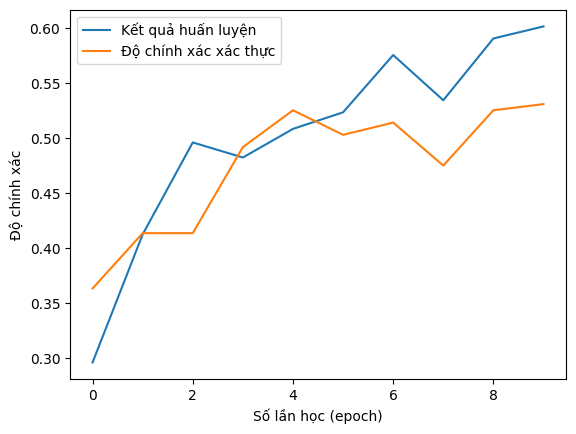

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers'
img_width, img_height = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"  # Tập huấn luyện
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation"  # Tập xác thực
)

# Mục chứa flowers không xác định được có bao nhiêu lớp nên để số tự động
num_classes = train_generator.num_classes


model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])


model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

model.summary()

plt.plot(history.history['accuracy'], label = "Kết quả huấn luyện")
plt.plot(history.history['val_accuracy'], label="Độ chính xác xác thực")
plt.xlabel("Số lần học (epoch)")
plt.ylabel("Độ chính xác")
plt.legend()
plt.show()



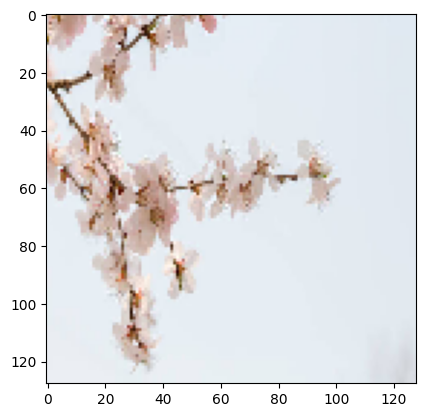

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Đây là hoa: hoa anh đào


In [13]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa anh đào/istockphoto-1137952280-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

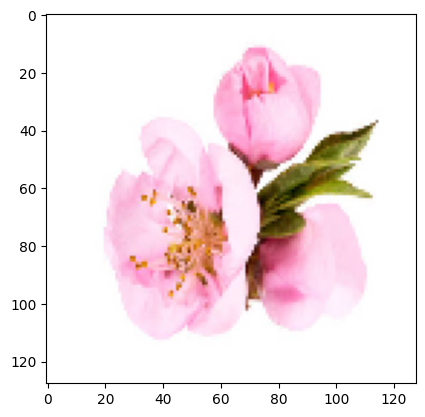

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Đây là hoa: hoa anh đào


In [14]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa anh đào/istockphoto-1141929227-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

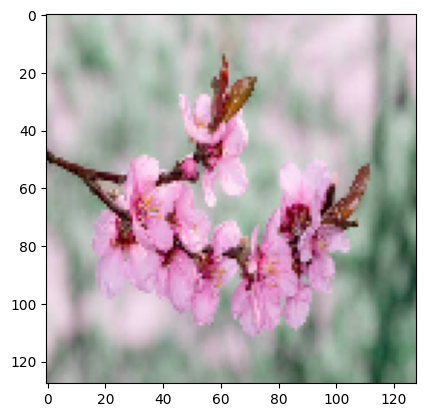

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Đây là hoa: hoa anh đào


In [15]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa anh đào/istockphoto-1160031695-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

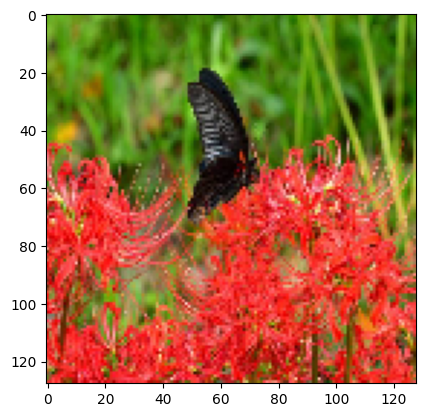

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Đây là hoa: hoa bỉ ngạn


In [16]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa bỉ ngạn/istockphoto-853719084-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

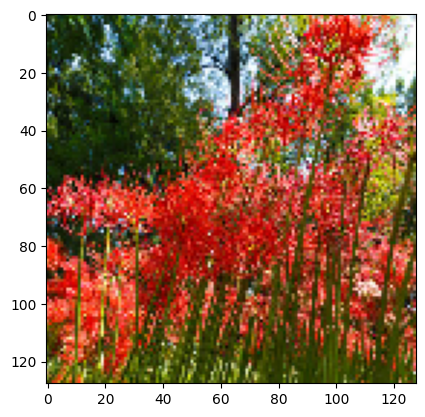

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Đây là hoa: hoa bỉ ngạn


In [18]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa bỉ ngạn/istockphoto-855852740-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

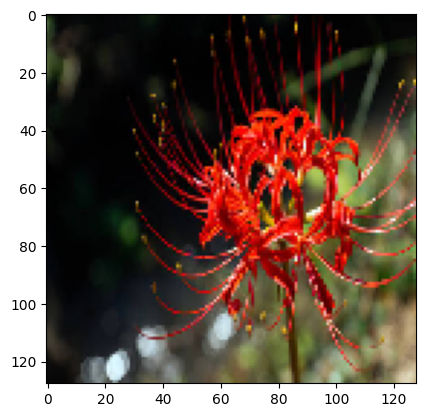

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Đây là hoa: hoa bỉ ngạn


In [19]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path= '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa bỉ ngạn/istockphoto-1153997531-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

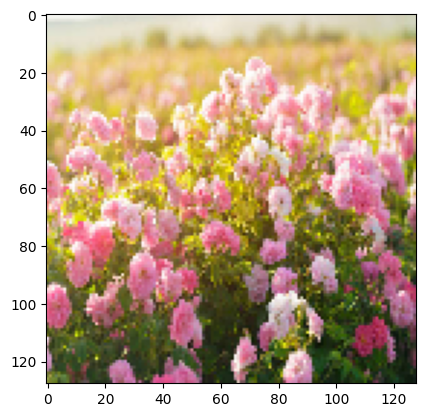

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Đây là hoa: hoa hồng


In [20]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hồng/istockphoto-1028122658-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

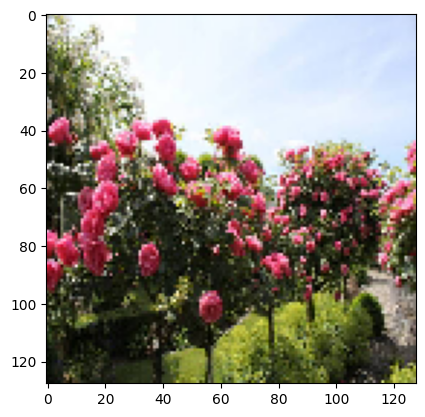

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Đây là hoa: hoa hồng


In [23]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hồng/istockphoto-1067990876-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

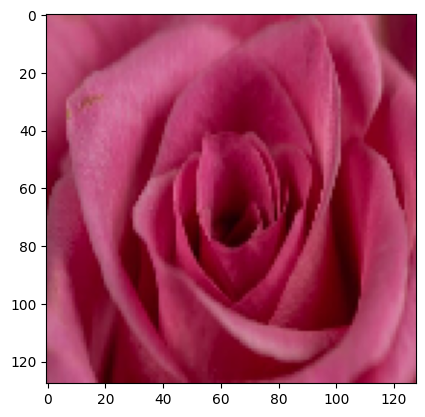

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Đây là hoa: hoa hồng


In [24]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hồng/istockphoto-1075289598-640x640.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

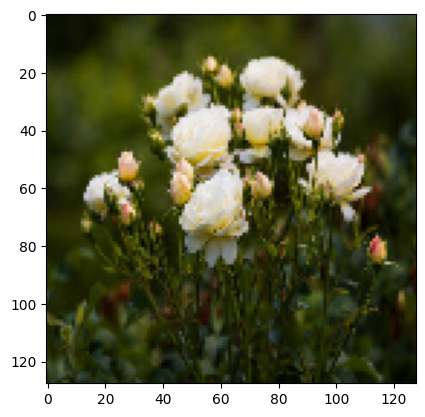

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Đây là hoa: hoa lưu ly


In [25]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hồng/istockphoto-1078521794-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

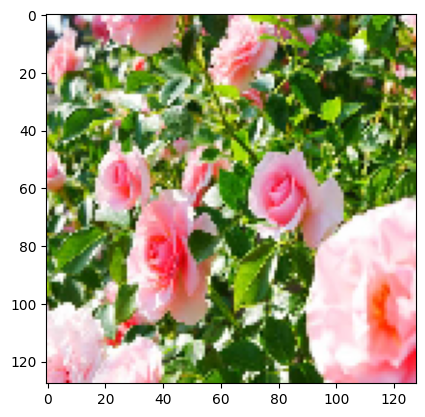

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Đây là hoa: hoa hồng


In [28]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path= '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hồng/istockphoto-1150267121-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

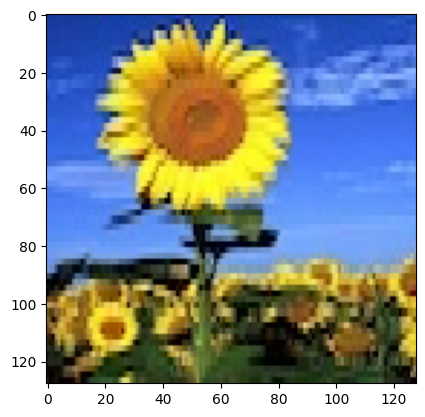

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Đây là hoa: hoa hướng dương


In [29]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hướng dương/huong duong 1.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

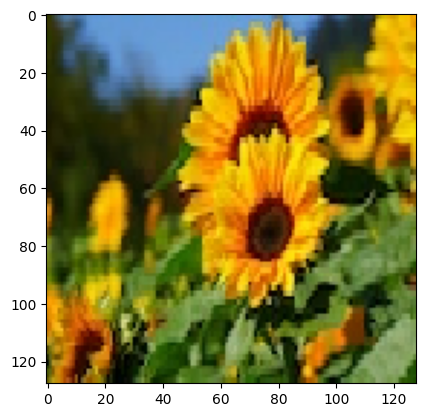

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Đây là hoa: hoa hướng dương


In [30]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hướng dương/huong duong 10.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

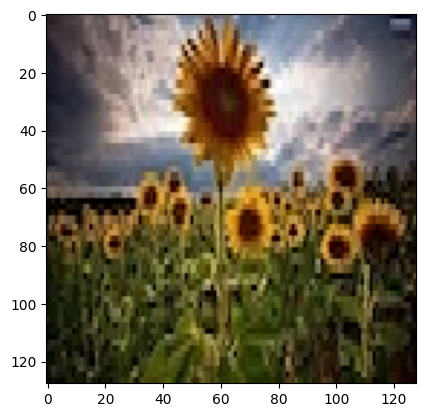

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Đây là hoa: hoa hướng dương


In [31]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa hướng dương/huong duong 100.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

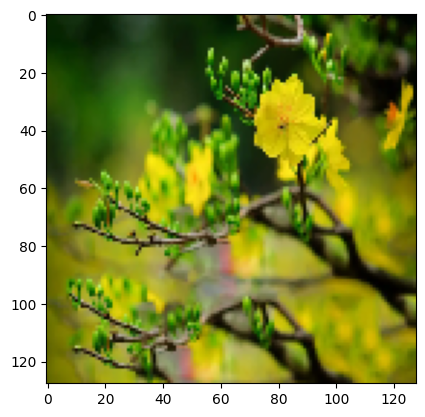

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Đây là hoa: hoa mai (1)


In [32]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa mai/download (11).png'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

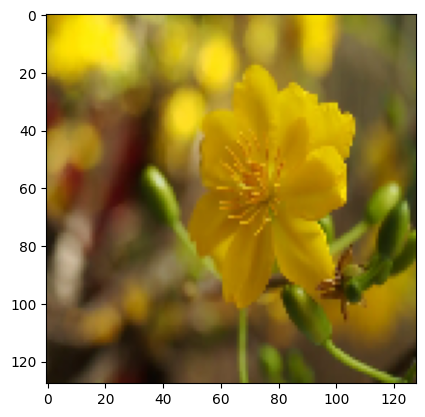

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Đây là hoa: hoa hướng dương


In [33]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa mai/download (12).png'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

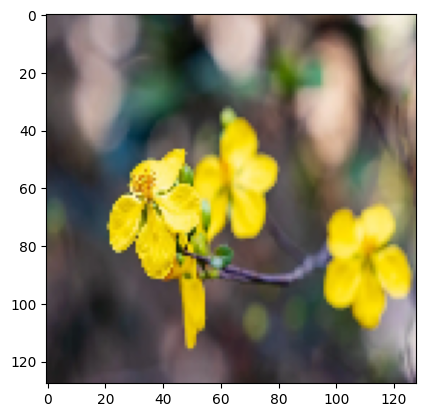

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Đây là hoa: hoa mai (1)


In [36]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa mai/download (17).png'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

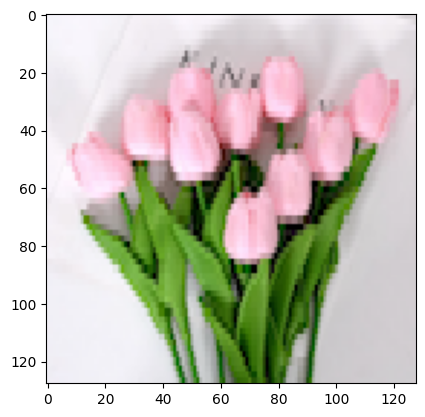

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Đây là hoa: hoa tulip


In [37]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa tulip/tulip.png'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

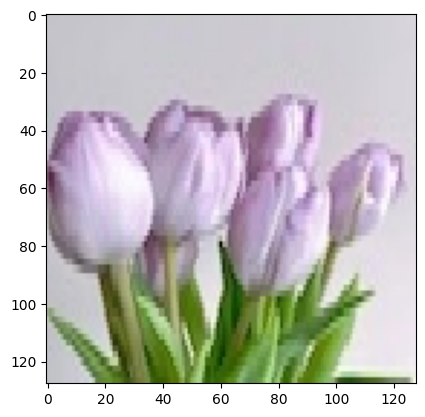

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Đây là hoa: hoa tulip


In [41]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa tulip/tulip18.jpeg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

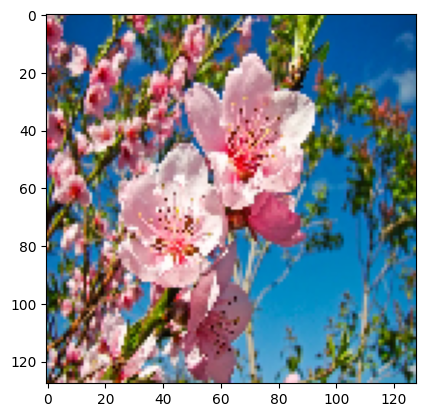

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Đây là hoa: hoa anh đào


In [53]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa đào/đào .webp'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

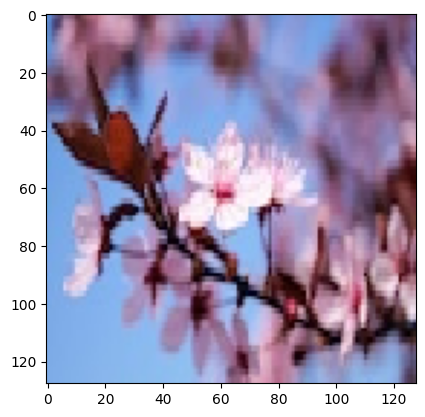

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Đây là hoa: hoa đào


In [54]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa đào/đào 10.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

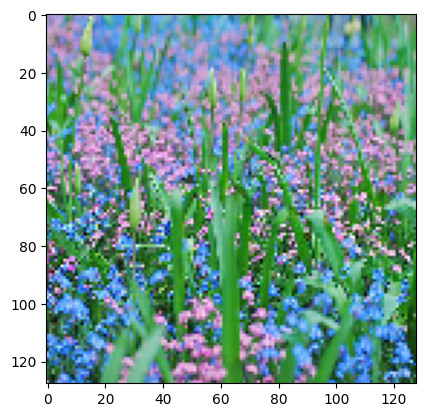

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Đây là hoa: hoa lưu ly


In [55]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa lưu ly/istockphoto-104429200-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

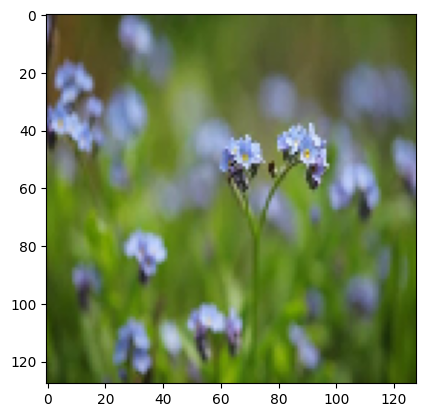

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Đây là hoa: hoa lưu ly


In [56]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa lưu ly/istockphoto-104453937-640x640.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")

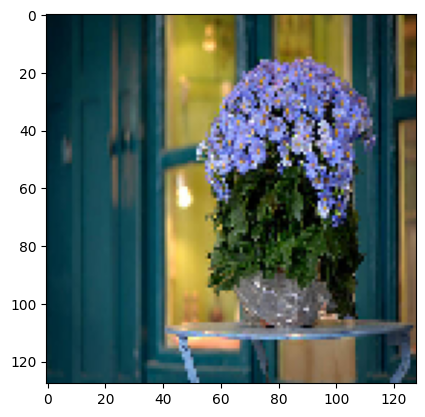

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Đây là hoa: hoa lưu ly


In [57]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Flowers/Flowers-20250321T145730Z-001/Flowers/hoa lưu ly/istockphoto-111927143-612x612.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()


img_array = np.array(img)

img_array = img_array / 255.0

img_array = img_array.reshape(1, 128, 128, 3)
prediction = np.argmax(model.predict(img_array))
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_labels[prediction]

print(f"Đây là hoa: {predicted_class}")